In [64]:
%load_ext autoreload
%autoreload 2

import torch
from PIL import Image
import os
from glob import glob 
from playground_utils import *

from models import DispNetS, PoseExpNet
from utils import tensor2array

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
dispnet_path = os.environ['Dataria'] + 'Models/sfm-learner/dispnet_model_best.pth.tar'
disp_net = DispNetS()
weights = torch.load(dispnet_path)
disp_net.load_state_dict(weights['state_dict'])
disp_net.eval();

In [48]:
DIR = f'{os.environ["Dataria"]}/KITTI/2011_09_26/2011_09_26_drive_0001_sync/image_03/data/'
ims_p =  glob(DIR+'*.png')

# Estimate Detph

In [49]:
tensor_img, img = load_image(ims_p[0])

In [50]:
output = disp_net(tensor_img)[0]

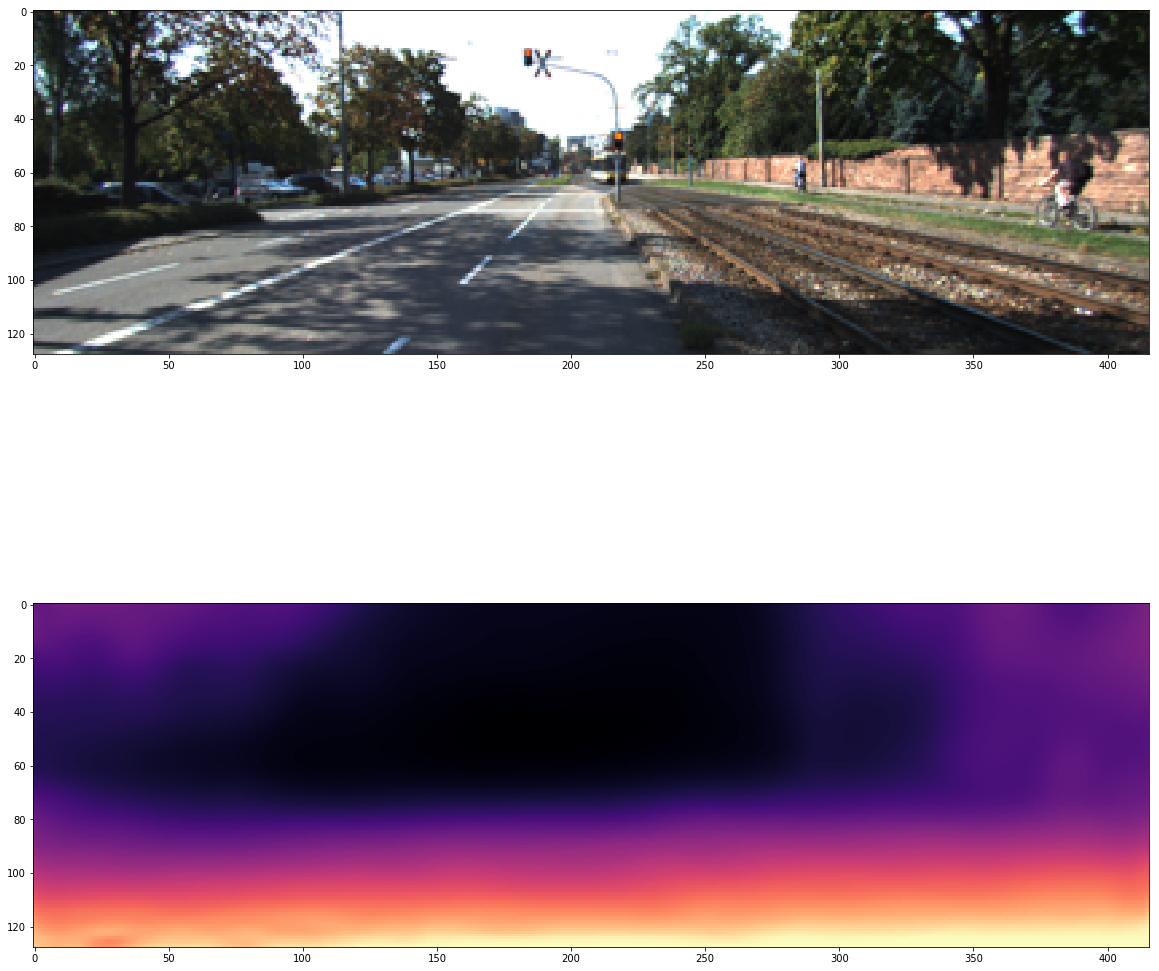

In [51]:
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(output[0].detach(), cmap='magma')

# Estimate Ego-Motion and Explainability

In [106]:
idx = 10
target_timg, target_img = load_image(ims_p[idx])
ref_imgs = [load_image(ims_p[i])[1] for i in [idx-2,idx-1,idx+1,idx+2]]
ref_timgs = [load_image(ims_p[i])[0] for i in [idx-2,idx-1,idx+1,idx+2]]

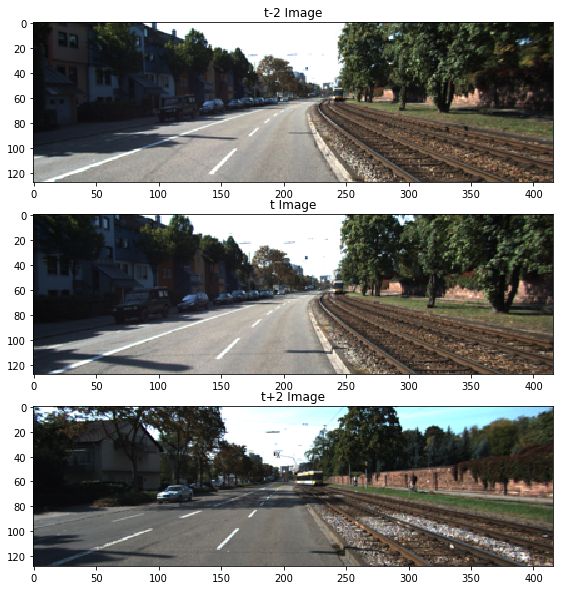

In [108]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.title('t-2 Image')
plt.imshow(ref_imgs[0])
plt.subplot(312)
plt.title('t Image')
plt.imshow(target_img)
plt.subplot(313)
plt.title('t+2 Image')
plt.imshow(ref_imgs[-1])

In [109]:
expnet_path = os.environ['Dataria'] + 'Models/sfm-learner/exp_pose_model_best.pth.tar'

In [110]:
expnet = PoseExpNet(nb_ref_imgs=4, output_exp=False)
weights = torch.load(expnet_path)
expnet.load_state_dict(weights['state_dict'])
expnet.eval();

In [112]:
exp_mask, pose  = expnet(target_timg, ref_timgs)

In [117]:
pose[0,0,:]

tensor([ 7.2267e-03,  8.5822e-05,  2.9513e-01,  5.1142e-03,  6.9927e-02,
        -4.3081e-03], grad_fn=<SliceBackward>)